# Proyecto: Innovación Tecnológica en Bodoque Bank

**MDS7202: Laboratorio de Programación Científica para Ciencia de Datos**

### Cuerpo Docente:

- Profesor: Pablo Badilla, Ignacio Meza De La Jara
- Auxiliar: Sebastián Tinoco
- Ayudante: Diego Cortez M., Felipe Arias T.

*Por favor, lean detalladamente las instrucciones de la tarea antes de empezar a escribir.*




# Proyecto

### Equipo:

- Ricardo Espinoza
- Cristóbal Guerra


### Link de repositorio de GitHub: `https://github.com/cristobalg68/Labs-Espinoza-Guerra.git`




## 1. Introducción


En el presente notebook se trabaja sobre el dataset "The Bank Account Fraud (BAF)" para generar un análisis exploratorio de datos (EDA) que describa el dataset e identificar anomalías del mismo. El proyecto en si consiste de las siguientes etapas:

1. Introducción
2. Lectura y manejo de datos
3. Análisis exploratorio de datos
4. Preprocesamiento
5. Visualización en baja dimensionalidad
6. Identificación de anomalías

El Dataset utilizado se presenta como uno realista y dinámico, pues contiene datos temporales y casos reales de detección de fraude bancario. Asimismo, se dice que este es sesgado ya que posee diferentes tipos de bias, preserva la privacidad de las personas detrás de los datos, y es desbalanceado pues la clase positiva de fraude es extremadamente pequeña. En concreto, el dataset sobre el que se trabaja se genera mediante la unión de 3 dataframes de nombres: "df_1.parquet" (389.782 filas y 29 columnas), "df_2.parquet" (747.410 filas y 29 columnas) y "df_email_phone.parquet" (934.730 filas y 7 columnas). De esta forma, el dataframe con el que se trabaja cuenta con:

* 1.198.151 registros
* 35 variables

Para abordar el problema de detección de anomalías, se hipotetiza que serviría utilizar alguna de las técnicas provistas por Scikit-Learn y revisadas en clases: Isolation Forest o Novelty Detection.
 

## 2. Lectura y Manejo de Datos




### 2.0 Conexión con Drive e importación del librerias

In [ ]:
!pip install ydata_profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.3/352.3 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 56.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=4d42fc54e74f5086aea1efb1e47d66c6cc17ee8ffb27b1e6ee8e656f2655b9ee
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    

In [ ]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn import set_config
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


### 2.1 Cargar datos en dataframes

In [ ]:
path_df1 = '/content/drive/Othercomputers/Mi PC/Estudios/Universidad/Semestre_2023_1/Laboratorio_de_Programación_Científica_para_Ciencia_de_Datos/Proyectos/Proyecto_1/data/df_1.parquet'
path_df2 = '/content/drive/Othercomputers/Mi PC/Estudios/Universidad/Semestre_2023_1/Laboratorio_de_Programación_Científica_para_Ciencia_de_Datos/Proyectos/Proyecto_1/data/df_2.parquet'
path_df_email = '/content/drive/Othercomputers/Mi PC/Estudios/Universidad/Semestre_2023_1/Laboratorio_de_Programación_Científica_para_Ciencia_de_Datos/Proyectos/Proyecto_1/data/df_email_phone.parquet'

In [ ]:
#path_df1 = '/content/drive/My Drive/Proyecto_1/data/df_1.parquet'
#path_df2 = '/content/drive/My Drive/Proyecto_1/data/df_2.parquet'
#path_df_email = '/content/drive/My Drive/Proyecto_1/data/df_email_phone.parquet'

In [ ]:
df_1 = pd.read_parquet(path_df1)
df_2 = pd.read_parquet(path_df2)
df_email = pd.read_parquet(path_df_email)

### 2.2 Exploración inicial

#### df_1

In [ ]:
df_1.head(5)

,id,fraud_bool,income,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_fraud_count,month,x1,x2
104446,729517,0,0.7,-1,305,60,0.030059,-1.599455,AC,990,...,500.0,0,INTERNET,8.865992,windows,0,0,2,-0.245425,0.568811
269483,149585,0,0.8,-1,140,50,0.015659,3.951994,AA,1269,...,200.0,0,INTERNET,4.654872,linux,1,0,7,0.009336,-2.096682
4102,64486,0,0.9,-1,171,50,0.001409,28.159779,AB,4430,...,1500.0,0,INTERNET,3.720953,linux,1,0,1,2.229616,-0.005823
351767,825283,0,0.5,-1,85,30,0.027292,-1.310498,AB,1698,...,200.0,0,INTERNET,2.912670,windows,1,0,3,-0.193945,0.861207
126377,8308,0,0.9,-1,39,30,0.010945,-1.450972,AC,569,...,200.0,0,INTERNET,2.283680,other,1,0,3,-2.440650,0.354986


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389782 entries, 104446 to 193209
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id                            389782 non-null  int64  
 1   fraud_bool                    389782 non-null  int64  
 2   income                        389782 non-null  float64
 3   prev_address_months_count     389782 non-null  int64  
 4   current_address_months_count  389782 non-null  int64  
 5   customer_age                  389782 non-null  int64  
 6   days_since_request            389782 non-null  float64
 7   intended_balcon_amount        389782 non-null  float64
 8   payment_type                  389782 non-null  object 
 9   zip_count_4w                  389782 non-null  int64  
 10  velocity_6h                   389782 non-null  float64
 11  velocity_24h                  389782 non-null  float64
 12  velocity_4w                   389782 no

Este primer dataframe contiene 389.782 filas y 29 columnas.

#### df_2

In [ ]:
df_2.head(5)

,id,fraud_bool,income,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_fraud_count,month,x1,x2
699954,303612,0,0.8,-1,21,40,0.010837,-0.853976,AD,239,...,200.0,0,INTERNET,48.127390,other,0,0,3,0.236931,0.077061
701206,568066,0,0.9,-1,70,50,0.711485,25.137456,AA,1873,...,200.0,0,INTERNET,8.792273,windows,1,0,3,0.571536,1.151563
270304,893344,0,0.7,-1,133,50,0.006856,-0.815330,AC,675,...,1000.0,0,INTERNET,15.916225,other,1,0,7,0.224252,-0.590459
346538,247688,0,0.8,-1,207,50,0.026194,-0.736615,AB,999,...,200.0,0,INTERNET,0.509942,linux,1,0,6,0.648528,-0.315911
147297,674478,0,0.8,-1,24,50,0.012646,10.744253,AA,3198,...,500.0,1,INTERNET,10.562945,other,0,0,6,0.041475,0.383332


In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 747410 entries, 699954 to 384611
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id                            747410 non-null  int64  
 1   fraud_bool                    747410 non-null  int64  
 2   income                        747410 non-null  float64
 3   prev_address_months_count     747410 non-null  int64  
 4   current_address_months_count  747410 non-null  int64  
 5   customer_age                  747410 non-null  int64  
 6   days_since_request            747410 non-null  float64
 7   intended_balcon_amount        747410 non-null  float64
 8   payment_type                  747410 non-null  object 
 9   zip_count_4w                  747410 non-null  int64  
 10  velocity_6h                   747410 non-null  float64
 11  velocity_24h                  747410 non-null  float64
 12  velocity_4w                   747410 no

Este segundo dataframe contiene 747.410 filas y 29 columnas.

#### df_email

In [ ]:
df_email.head(5)

,id,name_email_similarity,date_of_birth_distinct_emails_4w,email_is_free,device_distinct_emails_8w,phone_home_valid,phone_mobile_valid
987231,624588,0.555653,15,0,1,0,1
79954,620810,0.849718,2,0,1,0,0
567130,580633,0.110898,3,0,1,1,0
500891,6379,0.671250,15,0,1,0,1
55399,366511,0.772932,7,0,1,0,1


In [ ]:
df_email.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934730 entries, 987231 to 986114
Data columns (total 7 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   id                                934730 non-null  int64  
 1   name_email_similarity             934730 non-null  float64
 2   date_of_birth_distinct_emails_4w  934730 non-null  int64  
 3   email_is_free                     934730 non-null  int64  
 4   device_distinct_emails_8w         934730 non-null  int64  
 5   phone_home_valid                  934730 non-null  int64  
 6   phone_mobile_valid                934730 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 57.1 MB


Este último dataframe contiene 934.730 filas y 7 columnas.

### 2.3 Unir dataframes

In [ ]:
df = pd.concat((df_1, df_2))

### 2.4 Unir nuevas variables

In [ ]:
df = df.merge(df_email, how='outer')

### 2.5 Verificar nulos y duplicados, generar explicaciones sobre sus fuentes y proponer soluciones.



In [ ]:
nulos = df.isna().sum()
print(f'Cantidad de valores nulos por columna:\n{nulos}')

Cantidad de valores nulos por columna:
id                                      0
fraud_bool                          60959
income                              60959
prev_address_months_count           60959
current_address_months_count        60959
customer_age                        60959
days_since_request                  60959
intended_balcon_amount              60959
payment_type                        60959
zip_count_4w                        60959
velocity_6h                         60959
velocity_24h                        60959
velocity_4w                         60959
bank_branch_count_8w                60959
employment_status                   60959
credit_risk_score                   60959
housing_status                      60959
bank_months_count                   60959
has_other_cards                     60959
proposed_credit_limit               60959
foreign_request                     60959
source                              60959
session_length_in_minutes           6

In [ ]:
cols_to_check = df.columns
df['is_na'] = df[cols_to_check].isnull().apply(lambda x: all(x), axis=1)

In [ ]:
df['is_na'].unique()

array([False])

In [ ]:
df = df.drop(['is_na'], axis=1)

In [ ]:
df.iloc[900000]

id                                        96432
fraud_bool                                  0.0
income                                      0.3
prev_address_months_count                  -1.0
current_address_months_count              197.0
customer_age                               50.0
days_since_request                     0.028533
intended_balcon_amount                25.875943
payment_type                                 AA
zip_count_4w                             3157.0
velocity_6h                          641.622572
velocity_24h                        8700.017051
velocity_4w                         5457.539177
bank_branch_count_8w                      709.0
employment_status                            CB
credit_risk_score                         182.0
housing_status                               BB
bank_months_count                          28.0
has_other_cards                             0.0
proposed_credit_limit                    1500.0
foreign_request                         

In [ ]:
df.iloc[1198146]

id                                     36622
fraud_bool                               NaN
income                                   NaN
prev_address_months_count                NaN
current_address_months_count             NaN
customer_age                             NaN
days_since_request                       NaN
intended_balcon_amount                   NaN
payment_type                             NaN
zip_count_4w                             NaN
velocity_6h                              NaN
velocity_24h                             NaN
velocity_4w                              NaN
bank_branch_count_8w                     NaN
employment_status                        NaN
credit_risk_score                        NaN
housing_status                           NaN
bank_months_count                        NaN
has_other_cards                          NaN
proposed_credit_limit                    NaN
foreign_request                          NaN
source                                   NaN
session_le

Existe una gran cantidad de valores nulos debido a dos factores:
* Dado que existen registros en los dataframe 1 y 2 que no se encuentran en el dataframe de emails, al realizar el merge, el dataframe resultante contiene filas con las últimas 6 columnas con valores nulos (fila 900000).
* Dado que en el dataframe de email tiene registros que no están en el dataframe 1 o 2, en el dataframe final existen filas que tienen sus primeras 29 columnas con valores nulos (fila 1198146).

Se puede concluir que existen solo estos dos casos, pues el datraframe 1, 2 y el de email no tiene valores nulos por sí solos. Además, al unirlos en el dataframe final, no existen filas completamente nulas.

Finalmente, para el caso 1 se tienen 79.727 valores nulos y para el caso 2 60.959, sumando un total de 140.686 filas con algunas de sus columnas con valores nulos.

In [ ]:
unicos = df.nunique()
print(f'Cantidad de valores únicos por columna:\n{unicos}')

Cantidad de valores únicos por columna:
id                                  995817
fraud_bool                               2
income                                   9
prev_address_months_count              373
current_address_months_count           416
customer_age                             9
days_since_request                  925125
intended_balcon_amount              930349
payment_type                             5
zip_count_4w                          6238
velocity_6h                         933695
velocity_24h                        933964
velocity_4w                         933273
bank_branch_count_8w                  2320
employment_status                        7
credit_risk_score                      544
housing_status                           7
bank_months_count                       33
has_other_cards                          2
proposed_credit_limit                   12
foreign_request                          2
source                                   2
session_length

Dado que la cantidad de valores únicos para el id no es igual a la cantidad de filas del dataset, se puede concluir que existen filas duplicadas según el id. Además, dicha columna es la única que debería ser única, pues la naturaleza de las demás columnas indican que estás si pueden estar duplicadas.

In [ ]:
duplicados = df.duplicated(subset=['id'])
print(f'Presenta un total de {duplicados.sum()} filas con ids duplicados.')

Presenta un total de 202334 filas con ids duplicados.


In [ ]:
filas_duplicadas = df.iloc[duplicados.values]
print('Algunas de las filas con id duplicados son:')
display(filas_duplicadas.tail(10))

Algunas de las filas con id duplicados son:


,id,fraud_bool,income,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,device_fraud_count,month,x1,x2,name_email_similarity,date_of_birth_distinct_emails_4w,email_is_free,device_distinct_emails_8w,phone_home_valid,phone_mobile_valid
1076589,260720,0.0,0.1,-1.0,99.0,50.0,0.008474,-0.039916,AB,1404.0,...,0.0,3.0,-0.802390,-1.843331,0.762892,9.0,1.0,1.0,0.0,1.0
1076590,260720,0.0,0.1,-1.0,99.0,50.0,0.008474,-0.039916,AB,1404.0,...,0.0,3.0,-0.802390,-1.843331,0.762892,9.0,1.0,1.0,0.0,1.0
1077487,301981,0.0,0.2,-1.0,103.0,40.0,0.019037,-1.248327,AC,937.0,...,0.0,5.0,-0.181540,-0.247320,NaN,NaN,NaN,NaN,NaN,NaN
1077488,301981,0.0,0.2,-1.0,103.0,40.0,0.019037,-1.248327,AC,937.0,...,0.0,5.0,-0.181540,-0.247320,NaN,NaN,NaN,NaN,NaN,NaN
1092775,629483,0.0,0.7,-1.0,185.0,50.0,0.021152,23.545326,AB,1211.0,...,0.0,3.0,-0.275018,-1.118933,0.131632,3.0,1.0,1.0,0.0,1.0
1093921,981986,0.0,0.1,-1.0,200.0,40.0,0.009105,34.149532,AA,827.0,...,0.0,1.0,0.739115,-0.107993,0.583304,4.0,1.0,1.0,0.0,1.0
1093922,981986,0.0,0.1,-1.0,200.0,40.0,0.009105,34.149532,AA,827.0,...,0.0,1.0,0.739115,-0.107993,0.583304,4.0,1.0,1.0,0.0,1.0
1093923,981986,0.0,0.1,-1.0,200.0,40.0,0.009105,34.149532,AA,827.0,...,0.0,1.0,0.739115,-0.107993,0.583304,4.0,1.0,1.0,0.0,1.0
1104264,331527,0.0,0.1,-1.0,232.0,50.0,0.014329,-1.040394,AB,1333.0,...,0.0,1.0,0.093144,2.795091,NaN,NaN,NaN,NaN,NaN,NaN
1104265,331527,0.0,0.1,-1.0,232.0,50.0,0.014329,-1.040394,AB,1333.0,...,0.0,1.0,0.093144,2.795091,NaN,NaN,NaN,NaN,NaN,NaN


A partir de estos resultados se propone eliminar los registro duplicados segun el id, y luego los registro que contengan valores nulos en alguna columna.

### 2.6 Limpiar

In [ ]:
df = df.drop_duplicates(subset=['id'])
print(df.shape)
df = df.dropna()
print(df.shape)

(995817, 35)
(873771, 35)


Luego de unir los dataset y agregar a este las nuevas columnas, este contaba con 1.198.151 filas y 35 columnas. Despues de realizarle la eliminación de duplicados segun id el Dataset quedo con 995.817 filas y 35 columnas. Posterior a esto, se eliminaron los nan's y el Dataset final quedo con 873.771 filas y 35 columnas. 

### 2.7 Segmentación etaria



In [ ]:
df['segmentacion_etaria'] = ["Joven" if a < 18 else ("Adulto-Joven" if (a >= 18) and (a <= 26) else ("Adulto" if (a >= 27) and (a <= 59) else "Persona Mayor")) for a in df['customer_age']] 

## 3. Análisis Exploratorio de Datos

In [ ]:
profile = ProfileReport(df, title="EDA")
profile.to_file("eda.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### 3.1 Análisis del EDA

* En primer lugar, se puede aprecir que no existen valores duplicados ni nan's ya que se eliminaron previamente.

* Analizando los histogramas se nota que:
  * **Sin distribución**:
    * **fraud_bool**: La clase es del tipo categórica y está fuertemente desbalanceada, ya que el 98.9% (864.149) son cero y el 1.1% (9622) son uno.

    * **Variables categoricas**: Estas variables son del tipo categórica, por tanto, no tiene sentido analizar su distribución.

      * **payment_type**: Las categorías que esta presentan son AB (39.9%), AA (24.9%), AC (24.7%), AD (10.4%) y AE ( menor al 0.1%). Al ver los porcentajes, se concluye que las categorías estas desbalanceadas.

      * **employment_status**: Las categorías que esta presentan son CA (68.5%), CB (13.5%), CC (8.9%), CF (4.5%), CD (2.7%), CE (1.9%) y CG (menor al 0.1%). Al ver los porcentajes, se concluye que las categorías estas desbalanceadas.

      * **housing_status**: Las categorías que esta presentan son BC (33.5%), BB (30.1%), BA (21.6%), BE (12.0%), BD (2.6%), BF (0.2%) y BG (menor al 0.1%). Al ver los porcentajes, se concluye que las categorías estas desbalanceadas.

      * **has_other_cards**: Las categorías que esta presentan son 0.0 (75.1%) y 1.0 (24.9%). Al ver los porcentajes, se concluye que las categorías estas desbalanceadas.

      * **foreign_request**: Las categorías que esta presentan son 0.0 (97.6%) y 1.0 (2.4%). Al ver los porcentajes, se concluye que las categorías estas desbalanceadas.

      * **source**: Las categorías que esta presentan son INTERNET (99.2%) y TELEAPP (0.8%). Al ver los porcentajes, se concluye que las categorías estas desbalanceadas.

      * **device_os**: Las categorías que esta presentan son linux (33.7%), windows (30.4%), other (30.0%), macintosh (5.0%) y x11 (0.8%). Al ver los porcentajes, se concluye que las categorías estas desbalanceadas.

      * **keep_alive_session**: Las categorías que esta presentan son 0.0 (44.4%) y 1.0 (55.6%). Al ver los porcentajes, se concluye que las categorías estas balanceadas, pues la diferencia entre los porcentajes es poca.

      * **device_fraud_count**: Esta variable solo tiene la categoría "" (100%). Notar que esta puede ser representada por un 0.0. Se propone eliminar esta variable, pues no aporta información.

      * **email_is_free**: Las categorías que esta presentan son 0.0 (48.1%) y 1.0 (51.9%). Al ver los porcentajes, se concluye que las categorías estas balanceadas, pues la diferencia entre los porcentajes es poca.

      * **device_distinct_emails_8w**: Las categorías que esta presentan son 1.0 (96.4%), 2.0 (2.9%), 0.0 (0.7%) y -1.0 (menor al 0.1%). Al ver los porcentajes, se concluye que las categorías estas desbalanceadas.

      * **phone_home_valid**: Las categorías que esta presentan son 0.0 (50.7%) y 1.0 (49.3%). Al ver los porcentajes, se concluye que las categorías estas balanceadas, pues la diferencia entre los porcentajes es poca.

      * **phone_mobile_valid**: Las categorías que esta presentan son 1.0 (85.7%) y 0.0 (14.3%). Al ver los porcentajes, se concluye que las categorías estas desbalanceadas.

      * **segmentacion_etaria**: Las categorías que esta presentan son Adulto (71.8%), Adulto-Joven (14.7%), Persona Mayor (12.2%) y Joven (1.3%). Al ver los porcentajes, se concluye que las categorías estas desbalanceadas.

    * **Variables numericas**: Estas variables son del tipo numérica, pero su distribución no se asemeja a ninguna curva conocida.

      * **velocity_4w**

      * **bank_months_count**

      * **proposed_credit_limit**

      * **name_email_similarity**

  * **Distribuyen exponencial**:

    * **prev_address_months_count**: Al revisar esta variable se puede apreciar que es una variable del tipo numérica y que la gran mayoría de valores se concentra en -1.

    * **current_address_months_count**: Al revisar esta variable se puede apreciar que es una variable del tipo numérica y que contiene 416 valores distintos.

    * **days_since_request**: Al revisar esta variable se puede apreciar que es una variable del tipo numérica y que la gran mayoría de valores son distintos.

    * **intended_balcon_amount**: Al revisar esta variable se puede apreciar que es una variable del tipo numérica y que la gran mayoría de valores son distintos.

    * **bank_branch_count_8w**: Al revisar esta variable se puede apreciar que es una variable del tipo numérica. Además, se puede apreciar que la mayoría de valores se encuentran cercanos a cero.

    * **session_length_in_minutes**: Al revisar esta variable se puede apreciar que es una variable del tipo numérica y que la gran mayoría de valores son distintos.

  * **Distribuyen normal**:

    * **customer_age**: Al revisar esta variable se puede apreciar que es una variable del tipo numérica. Además, por cómo se construyo la variable, esta solo tiene 9 valores distintos.

    * **zip_count_4w**: Al revisar esta variable se puede apreciar que es una variable del tipo numérica, donde solamente el 0.7% es distinto. Además, se puede apreciar que es una normal desplazada hacia la izquierda.

    * **velocity_6h**: Al revisar esta variable se puede apreciar que es una variable del tipo numérica, donde la gran mayoría de valores son distintos. Además, se puede apreciar que es una normal desplazada hacia la izquierda.

    * **velocity_24h**: Al revisar esta variable se puede apreciar que es una variable del tipo numérica, donde la gran mayoría de valores son distintos.

    * **credit_risk_score**: Al revisar esta variable se puede apreciar que es una variable del tipo numérica, donde solamente el 0.1% es distinto.

    * **x1**: Al revisar esta variable se puede apreciar que es una variable del tipo numérica y que tiene todos sus valores distintos (normal perfecta).

    * **x2**: Al revisar esta variable se puede apreciar que es una variable del tipo numérica y que tiene todos sus valores distintos (normal perfecta).

    * **month**: Al revisar esta variable se puede apreciar que es una variable del tipo numérica y que solo tiene 8 valores distintos.
    
    * **date_of_birth_distinct_emails_4w**: Al revisar esta variable se puede apreciar que es una variable del tipo numérica, donde menos del 0.1% es distinto (40 valores distintos). Además, se puede apreciar que es una normal desplazada hacia la izquierda.

  * **Distribuye cuadrática**: 

    * **income**: Esta variable es del tipo numérica y su distribución se asemeja a la curva de una función cuadrática negativa.


In [ ]:
most_important = ['fraud_bool', 'income', 'prev_address_months_count', 'current_address_months_count', 'days_since_request', 'payment_type',
                  'date_of_birth_distinct_emails_4w', 'name_email_similarity', 'segmentacion_etaria', 'employment_status', 'credit_risk_score',
                  'email_is_free', 'bank_months_count', 'has_other_cards']

array([[<Axes: xlabel='fraud_bool', ylabel='fraud_bool'>,
        <Axes: xlabel='income', ylabel='fraud_bool'>,
        <Axes: xlabel='prev_address_months_count', ylabel='fraud_bool'>,
        <Axes: xlabel='current_address_months_count', ylabel='fraud_bool'>,
        <Axes: xlabel='days_since_request', ylabel='fraud_bool'>,
        <Axes: xlabel='date_of_birth_distinct_emails_4w', ylabel='fraud_bool'>,
        <Axes: xlabel='name_email_similarity', ylabel='fraud_bool'>,
        <Axes: xlabel='credit_risk_score', ylabel='fraud_bool'>,
        <Axes: xlabel='email_is_free', ylabel='fraud_bool'>,
        <Axes: xlabel='bank_months_count', ylabel='fraud_bool'>,
        <Axes: xlabel='has_other_cards', ylabel='fraud_bool'>],
       [<Axes: xlabel='fraud_bool', ylabel='income'>,
        <Axes: xlabel='income', ylabel='income'>,
        <Axes: xlabel='prev_address_months_count', ylabel='income'>,
        <Axes: xlabel='current_address_months_count', ylabel='income'>,
        <Axes: xlabel='d

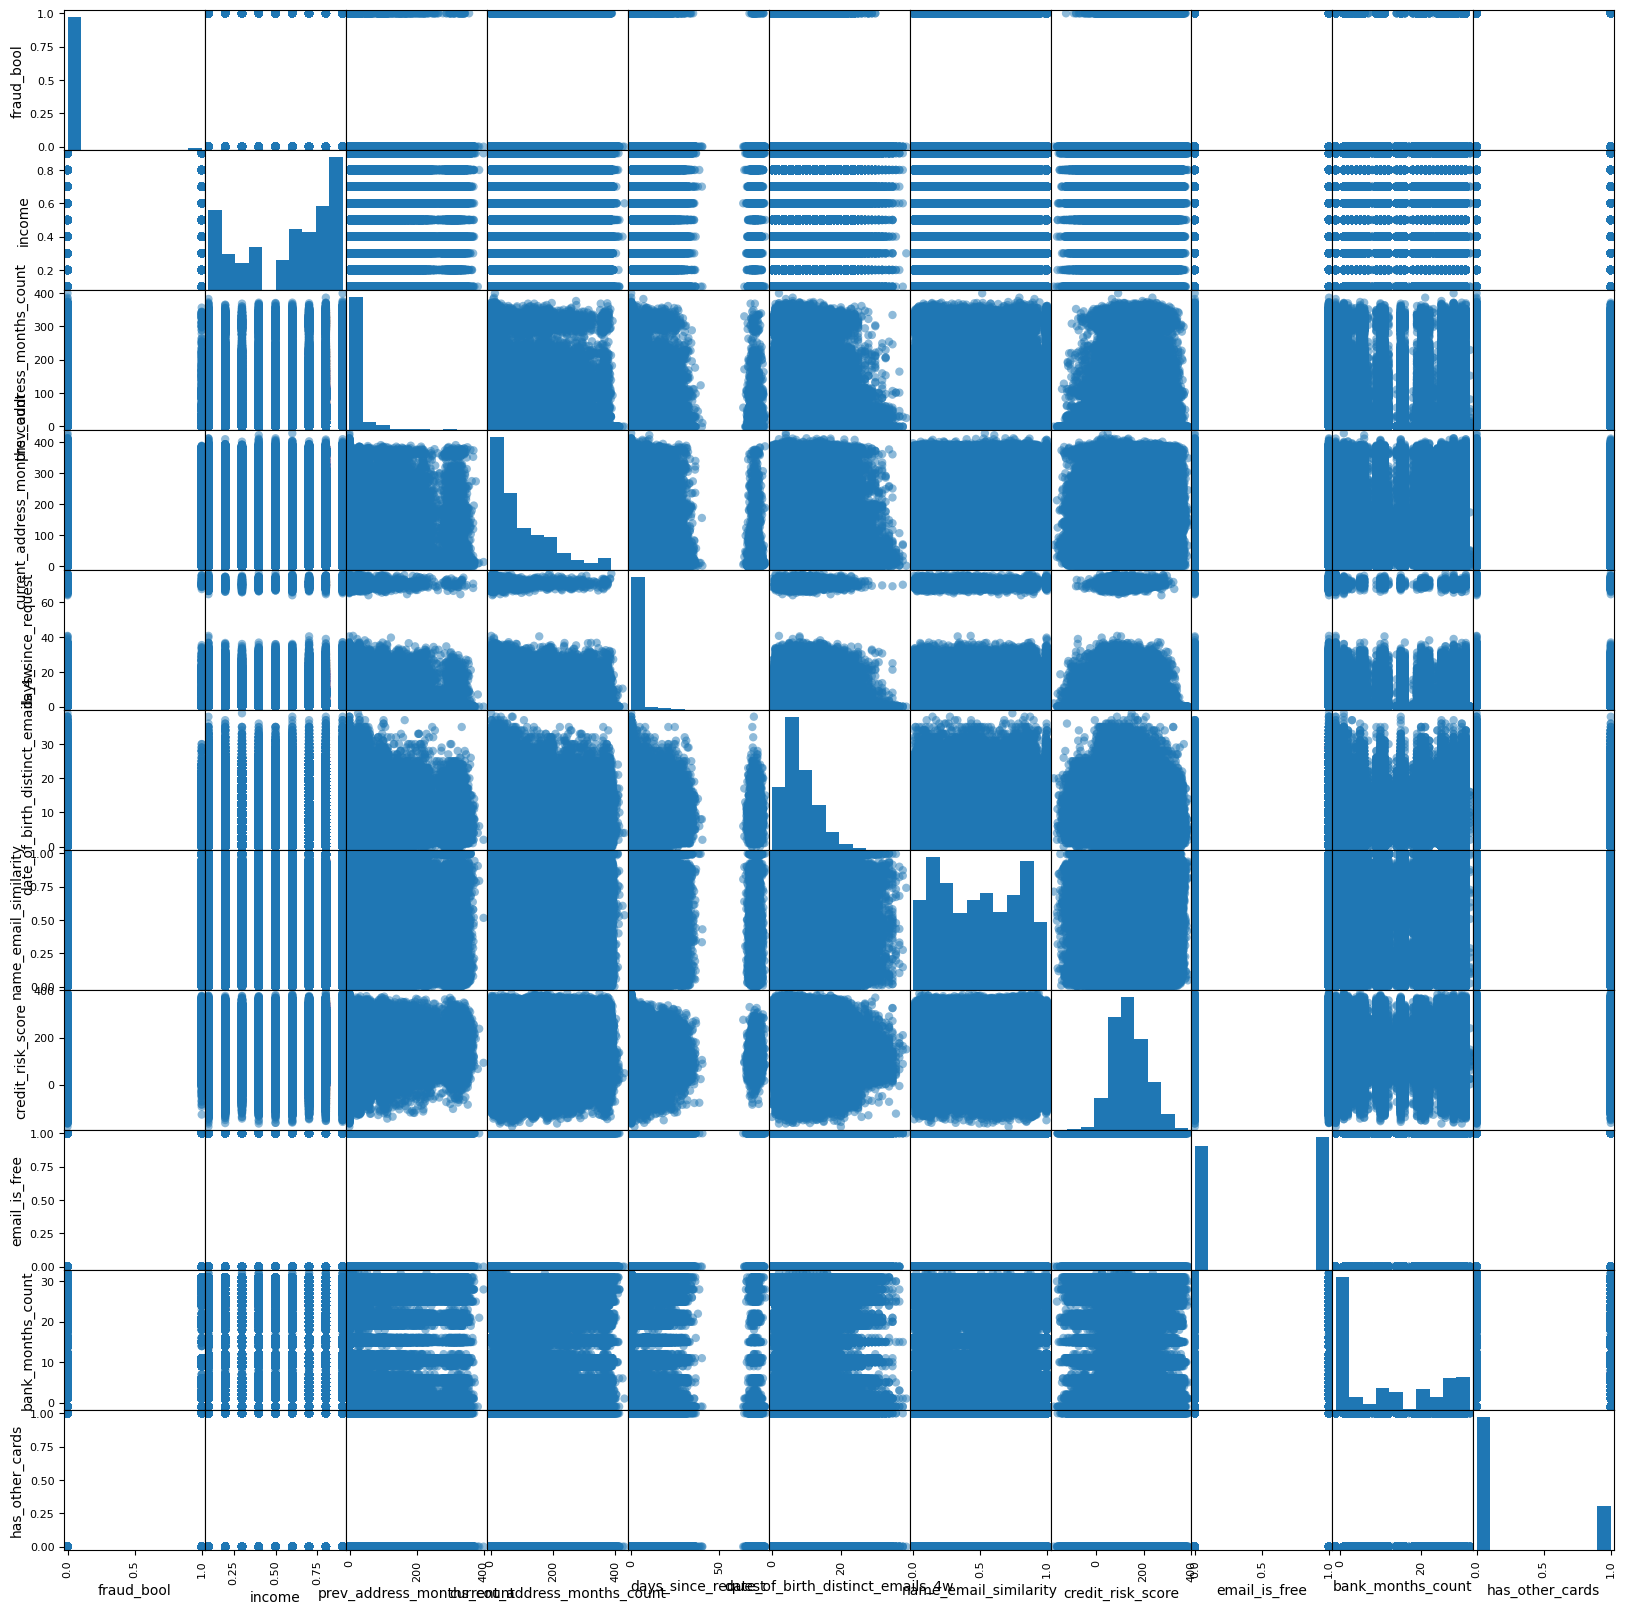

In [ ]:
pd.plotting.scatter_matrix(df[most_important], figsize=(20,20), grid=True, marker='o')

<ipython-input-29-4a4aadd0ec33>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df.corr()


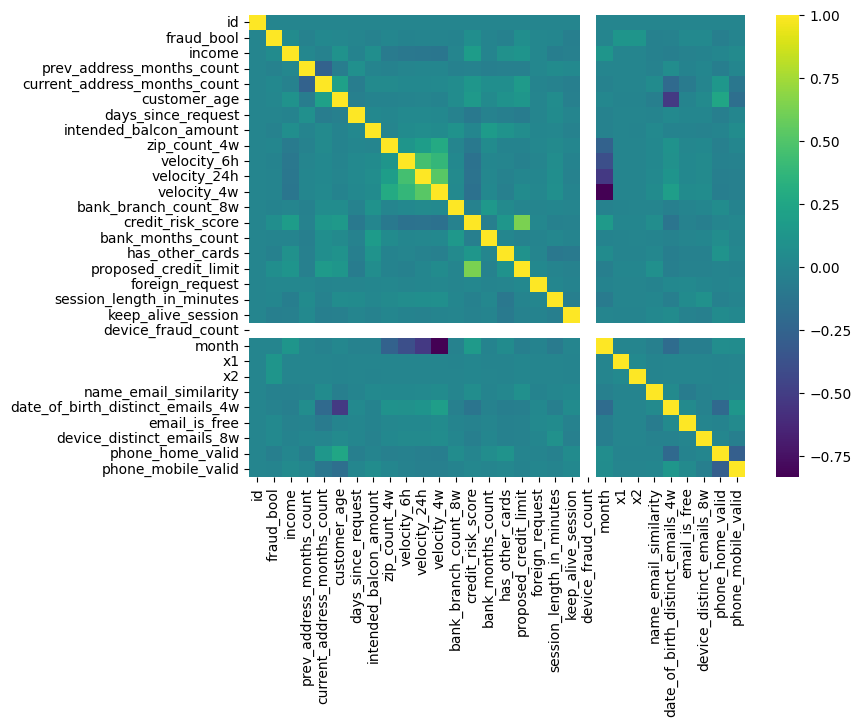

In [ ]:
corr_df = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, cmap="viridis")
plt.show()

* Al revisar la correlación entre las distintas variables, se pueden rescatar las siguientes conclusiones:

  * Las variables prev_address_months_count y current_address_months_count tienen una alta correlación negativa.

  * Las variables customer_age y date_of_birth_distinct_emails_4w tienen una alta correlación negativa.

  * Las variables current_address_months_count y date_of_birth_distinct_emails_4w tienen una alta correlación negativa.

  * Las variables velocity_24h y velocity_4w tienen una alta correlación positiva.

  * Las variables credit_risk_score y proposed_credit_limit tienen una alta correlación positiva.

  * Las variables month y zip_count_4w tienen una alta correlación positiva.

  * Las variables month y velocity_6h tienen una alta correlación positiva.

  * Las variables month y velocity_24h tienen una alta correlación positiva.

  * Las variables month y velocity_4w tienen una alta correlación positiva.

## 4. Preprocesamiento

### 4.1 Declarar `ColumnTransformer`

In [ ]:
set_config(transform_output="pandas")

categorical_transformer = OneHotEncoder(sparse_output=False)
ordinal_transformer = OrdinalEncoder(categories=[['Joven', 'Adulto-Joven', 'Adulto', 'Persona Mayor']])

categorical_columns = ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os', 'device_distinct_emails_8w']

ordinal_columns = ['segmentacion_etaria']

preprocessor = ColumnTransformer(
    transformers=[('categorical', categorical_transformer, categorical_columns),
                  ('ordinal', ordinal_transformer, ordinal_columns)
                  ],
    remainder='passthrough')

### 4.2 Transformar datos

In [ ]:
transformed_df = preprocessor.fit_transform(df)

## 5. Visualización en Baja Dimensionalidad

### 5.1 Muestrear dataframe

In [ ]:
df_muestra = transformed_df.sample(17000, random_state=22)
x = df_muestra.drop(columns=['remainder__fraud_bool'])
y_re = df_muestra[['remainder__fraud_bool', 'ordinal__segmentacion_etaria']]

### 5.2 Proyectar y agregar proyecciones al dataframe de muestreo

In [ ]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(x)
df_pca = pd.DataFrame(data=pca_features, columns=['pca0', 'pca1'])

class_names = {0:'not fraud', 1:'fraud'}
df_pca['fraud_bool'] = y_re['remainder__fraud_bool'].astype(int)
df_pca['fraud_bool'] = df_pca['fraud_bool'].map(class_names)
df_pca['ordinal__segmentacion_etaria'] = y_re['ordinal__segmentacion_etaria']

### 5.3 Visualizar según rangos etarios

In [ ]:
rangos_etario = ['Joven', 'Adulto-Joven', 'Adulto', 'Persona Mayor']

for e in [0.0, 1.0, 2.0, 3.0]:
    df_filter = df_pca[df_pca['ordinal__segmentacion_etaria'] == e]
    fig = px.scatter(df_filter, x = "pca0", y = "pca1", color = "fraud_bool", title = f"Gráfico para el rango etario {rangos_etario[int(e)]}")
    fig.show()

Notar que para el primer gráfico los puntos rojos representan los not fraud, mientras los azules son fraud.

## 6. Anomalías

### 6.1 Implementar detector de anomalías sobre dataframe de muestreo

In [ ]:
predictions_list = []
for e in [0.0, 1.0, 2.0, 3.0]:
    isf = IsolationForest(n_estimators=20)
    predictions_list.append(isf.fit_predict(x[x['ordinal__segmentacion_etaria'] == e]))

### 6.2 Agregar resultados a dataframe de muestreo & 6.3 Visualizar según rangos etarios

In [ ]:
for e in [0.0, 1.0, 2.0, 3.0]:
    pca = PCA(n_components=2)
    pca_features = pca.fit_transform(x[x['ordinal__segmentacion_etaria'] == e])
    df_pca = pd.DataFrame(data=pca_features, columns=['pca0', 'pca1'])

    class_names = {-1:'fraud', 1:'not fraud'}
    df_pca['fraud_bool'] = predictions_list[(int(e))]
    df_pca['fraud_bool'] = df_pca['fraud_bool'].map(class_names)

    fig = px.scatter(df_pca, x = "pca0", y = "pca1", color = "fraud_bool", title = f"Gráfico para el rango etario {rangos_etario[int(e)]}")
    fig.show()

Notar que para el primer gráfico los puntos rojos representan los not fraud, mientras los azules son fraud.

### 6.4 Calcular ratios y responder

In [ ]:
for e in [0.0, 1.0, 2.0, 3.0]:
    total_predicted_fraud = np.sum(predictions_list[int(e)] == -1)
    correctly_predicted_fraud = np.sum((predictions_list[int(e)] == -1) & (y_re[y_re['ordinal__segmentacion_etaria'] == e]['remainder__fraud_bool'] == 1))
    actual_fraud = np.sum(y_re[y_re['ordinal__segmentacion_etaria'] == e]['remainder__fraud_bool'] == 1)

    P = correctly_predicted_fraud / total_predicted_fraud
    R = correctly_predicted_fraud / actual_fraud

    print(f'Ratio P del rango etario {rangos_etario[int(e)]}:', P)
    print(f'Ratio R del rango etario {rangos_etario[int(e)]}:', R)

Ratio P del rango etario Joven: 0.07142857142857142
Ratio R del rango etario Joven: 1.0
Ratio P del rango etario Adulto-Joven: 0.006535947712418301
Ratio R del rango etario Adulto-Joven: 0.14285714285714285
Ratio P del rango etario Adulto: 0.018419777023751818
Ratio R del rango etario Adulto: 0.25333333333333335
Ratio P del rango etario Persona Mayor: 0.01282051282051282
Ratio R del rango etario Persona Mayor: 0.0967741935483871


El ratio P es la métrica Precision (o Precisión en español) y representa la proporción de casos positivos que fueron clasificados correctamente sobre todos los valores que fueron clasificados como positivos. En otras palabras, que tan preciso es el modelo a la hora de decir si un cliente es fraudulento. Si la Precision es 1, significa que todos los casos clasificados como fraudulentos efectivamente son fraudulentos.

El ratio R es la métrica Recall (o Exhaustividad en español) y representa la proporción de casos positivos que fueron clasificados correctamente sobre la totalidad de casos que realmente son positivos. En otras palabras, que tan bueno es el modelo para capturar a todos los casos que realmente son fraudulentos. Si el Recall es 1, significa que capturo a todos los casos que efectivamente eran fraudulentos.

Al revisar los ratios reportados, se puede concluir que las predicciones del modelo son malas, pues para todos los rangos etarios el modelo predice correctamente (Precision) una baja cantidad de elementos. Además, de la totalidad de elementos que efectivamente era fraude, el modelo solo es capaz de capturar a todos los casos de fraude solo para el primer rango etarios, pues para el resto de rangos etarios el modelo no es capaz de capturar a todos los casos de fraude.

En cuanto a la coherencia de los resultados, se dice que estos en general sí son coherentes, ya que previo a predecir faltó realizar ciertas cosas que mejorarían la exactitud del modelo, como hacer escalamiento de los datos o seleccionar características. Asimismo, se nota que el modelo en cuestión usado para detectar las anomalías es uno de tipo no supervisado, por lo que no es el mejor para esta clase de problemas, en su lugar se podría haber usado un algoritmo supervisado como SVM, regresión, XGBoost, etc.  

Con respecto al comportamiento de los casos de fraude para cada rango etario:

* Joven: se nota que estos se encuentran entre los valores -500k y 500k de la componente horizontal, mientras que están entre -2k y 4k para la componente vertical del gráfico, por lo que se dice que tienen mayor dispersión para la componente "pca0". De los resultados para precision y recall, se dice que si bien el modelo logra detectar el 100% de los datos "fraude", lo hace con una precisión muy baja (7%), lo que quiere decir que en general suele predecir que gran cantidad de los datos son de la clase "fraude" y falla en casi el 93% de las veces que lo hace.

* Adulto-joven: se nota que estos se encuentran distribuidos más o menos de manera equitativa entre los valores -500k y 500k de la componente horizontal, mientras que están entre -6k y 10k para la componente vertical del gráfico, pero con mayor concentración entre -6k y 4k específicamente. De los resultados para precision y recall, se dice que el modelo logra detectar el ~14% de los datos "fraude", pero lo hace con una precisión muy baja (0,6%), lo que quiere decir que en general suele predecir que gran cantidad de los datos son de la clase "fraude" y falla en casi el 99,4% de las veces que lo hace.

* Adulto: es muy similar al caso de adulto-joven pero con la diferencia de que se observa una mayor cantidad de fraudes dado que también hay mayor cantidad de datos, nuevamente los puntos se encuentran distribuidos más o menos de manera equitativa entre los valores -500k y 500k de la componente horizontal, mientras que están entre -6k y 10k para la componente vertical del gráfico, pero con mayor concentración entre -6k y 4k específicamente. De los resultados para precision y recall, se dice que el modelo logra detectar el ~25% de los datos "fraude", pero lo hace con una precisión muy baja (1,8%), lo que quiere decir que en general suele predecir que gran cantidad de los datos son de la clase "fraude" y falla en casi el 98,2% de las veces que lo hace.

* Persona mayor: en general los puntos se observan muy dispersos en el gráfico, entre -500k y 500k para la componente horizontal (pca0) y -6k y 10k para la componente vertical. De los resultados para precision y recall, se dice que el modelo logra detectar el ~9,7% de los datos "fraude", pero lo hace con una precisión muy baja (1,2%), lo que quiere decir que en general suele predecir que gran cantidad de los datos son de la clase "fraude" y falla en casi el 98,8% de las veces que lo hace.